In [2]:
import numpy as np
import matplotlib.pyplot as plt
# import corner
from emcee.backends import HDFBackend
import emcee
%matplotlib inline
import warnings
import os
from lisatools.utils.constants import PC_SI, YRSID_SI

In [3]:
true_vals_dict = {
    # Total *redshifted* mass M=m1+m2, solar masses
    "M": 2e6,
    # Mass ratio q=m1/m2
    "q": 3.0,
    # Dimensionless spin component 1 along orbital momentum
    "a1": 0.2,
    # Dimensionless spin component 2 along orbital momentum
    "a2": 0.4,
    # Time shift of coalescence, s -- coalescence is at t0*yr + Deltat*s, t0 in waveform_params
    "inc": np.pi/3,
    # Luminosity distance, Mpc
    "dist": 20,
    # Phase, observer's longitude in source-frame
    "phi_ref": np.pi,
    # Longitude in the sky
    "lam": np.pi/5,
    # Latitude in the sky
    "beta": np.pi/4,
    # Polarization angle
    "psi": np.pi/6,
    "t_ref": 1.0 * YRSID_SI
  }

true_vals_label_string = list(true_vals_dict.keys())
true_vals = list(true_vals_dict.values())

In [4]:
pwd

'/Users/oburke/Documents/LISA_Science/Projects/MBHs/MBH_Fisher/MBH_work/MCMC/notebooks'

In [5]:
os.chdir("/Users/oburke/Documents/LISA_Science/Projects/MBHs/MBH_Fisher/MBH_work/MCMC/mcmc_results")

In [6]:
reader = HDFBackend("test_MBH_mcmc.h5",read_only = True)

In [7]:
reader.get_chain().shape[-1]

11

In [10]:
ndim = reader.get_chain().shape[2] # Size of parameter space
nwalkers = reader.get_chain().shape[1]  # Number of walkers

burnin = 500
end = -1
samples = reader.get_chain(flat = False)[burnin:end].reshape(-1,ndim)

# M_samps = samples[:,0]
# q_samps = samples[:,1]
# chi1_samps = samples[:,2]
# chi2_samps = samples[:,3]
# tc_samps = samples[:,4]

# inc_samps = samples[:,5]
# D_samps = samples[:,6]

# phi_samps = samples[:,7]  
# lambda_samps = samples[:,8]
# beta_samps = samples[:,9]
# psi_samps = samples[:,10]   # Cannot resolve this parameter


collected_samps_MCMC = [samples[:,j] for j in range(ndim)]
N_samps = len(collected_samps_MCMC[0])
print('length of samples',N_samps)

length of samples 124950


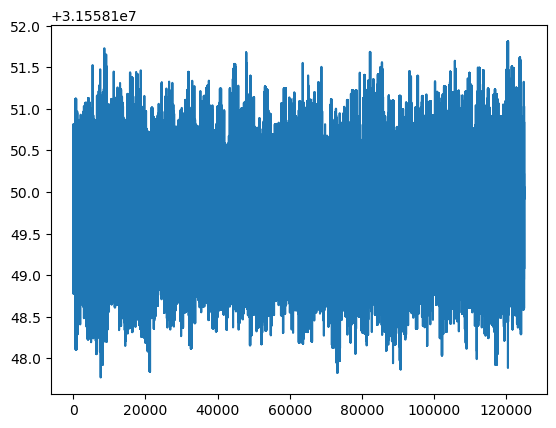

In [15]:
j = 0
plt.plot(collected_samps_MCMC[-1])

In [51]:
np.std(M_samps)

12434.5140097611

In [16]:
delta_theta = [np.std(collected_samps_MCMC[j]) for j in range(ndim)]

param_values = list(true_vals_dict.values())
for i in range(ndim):
        print("Relative precision in parameter {0} due to mismodelling is {1}".format(true_vals_label_string[i],delta_theta[i]))


Relative precision in parameter M due to mismodelling is 1100.7564950515775
Relative precision in parameter q due to mismodelling is 0.005532308319445507
Relative precision in parameter a1 due to mismodelling is 0.001066168720157036
Relative precision in parameter a2 due to mismodelling is 0.0019135488861218893
Relative precision in parameter inc due to mismodelling is 0.004346368593503364
Relative precision in parameter dist due to mismodelling is 0.06010520377697419
Relative precision in parameter phi_ref due to mismodelling is 0.01876890644473474
Relative precision in parameter lam due to mismodelling is 0.002737286742858985
Relative precision in parameter beta due to mismodelling is 0.0014070778617868874
Relative precision in parameter psi due to mismodelling is 0.01833792209611724
Relative precision in parameter t_ref due to mismodelling is 0.5119857929475202


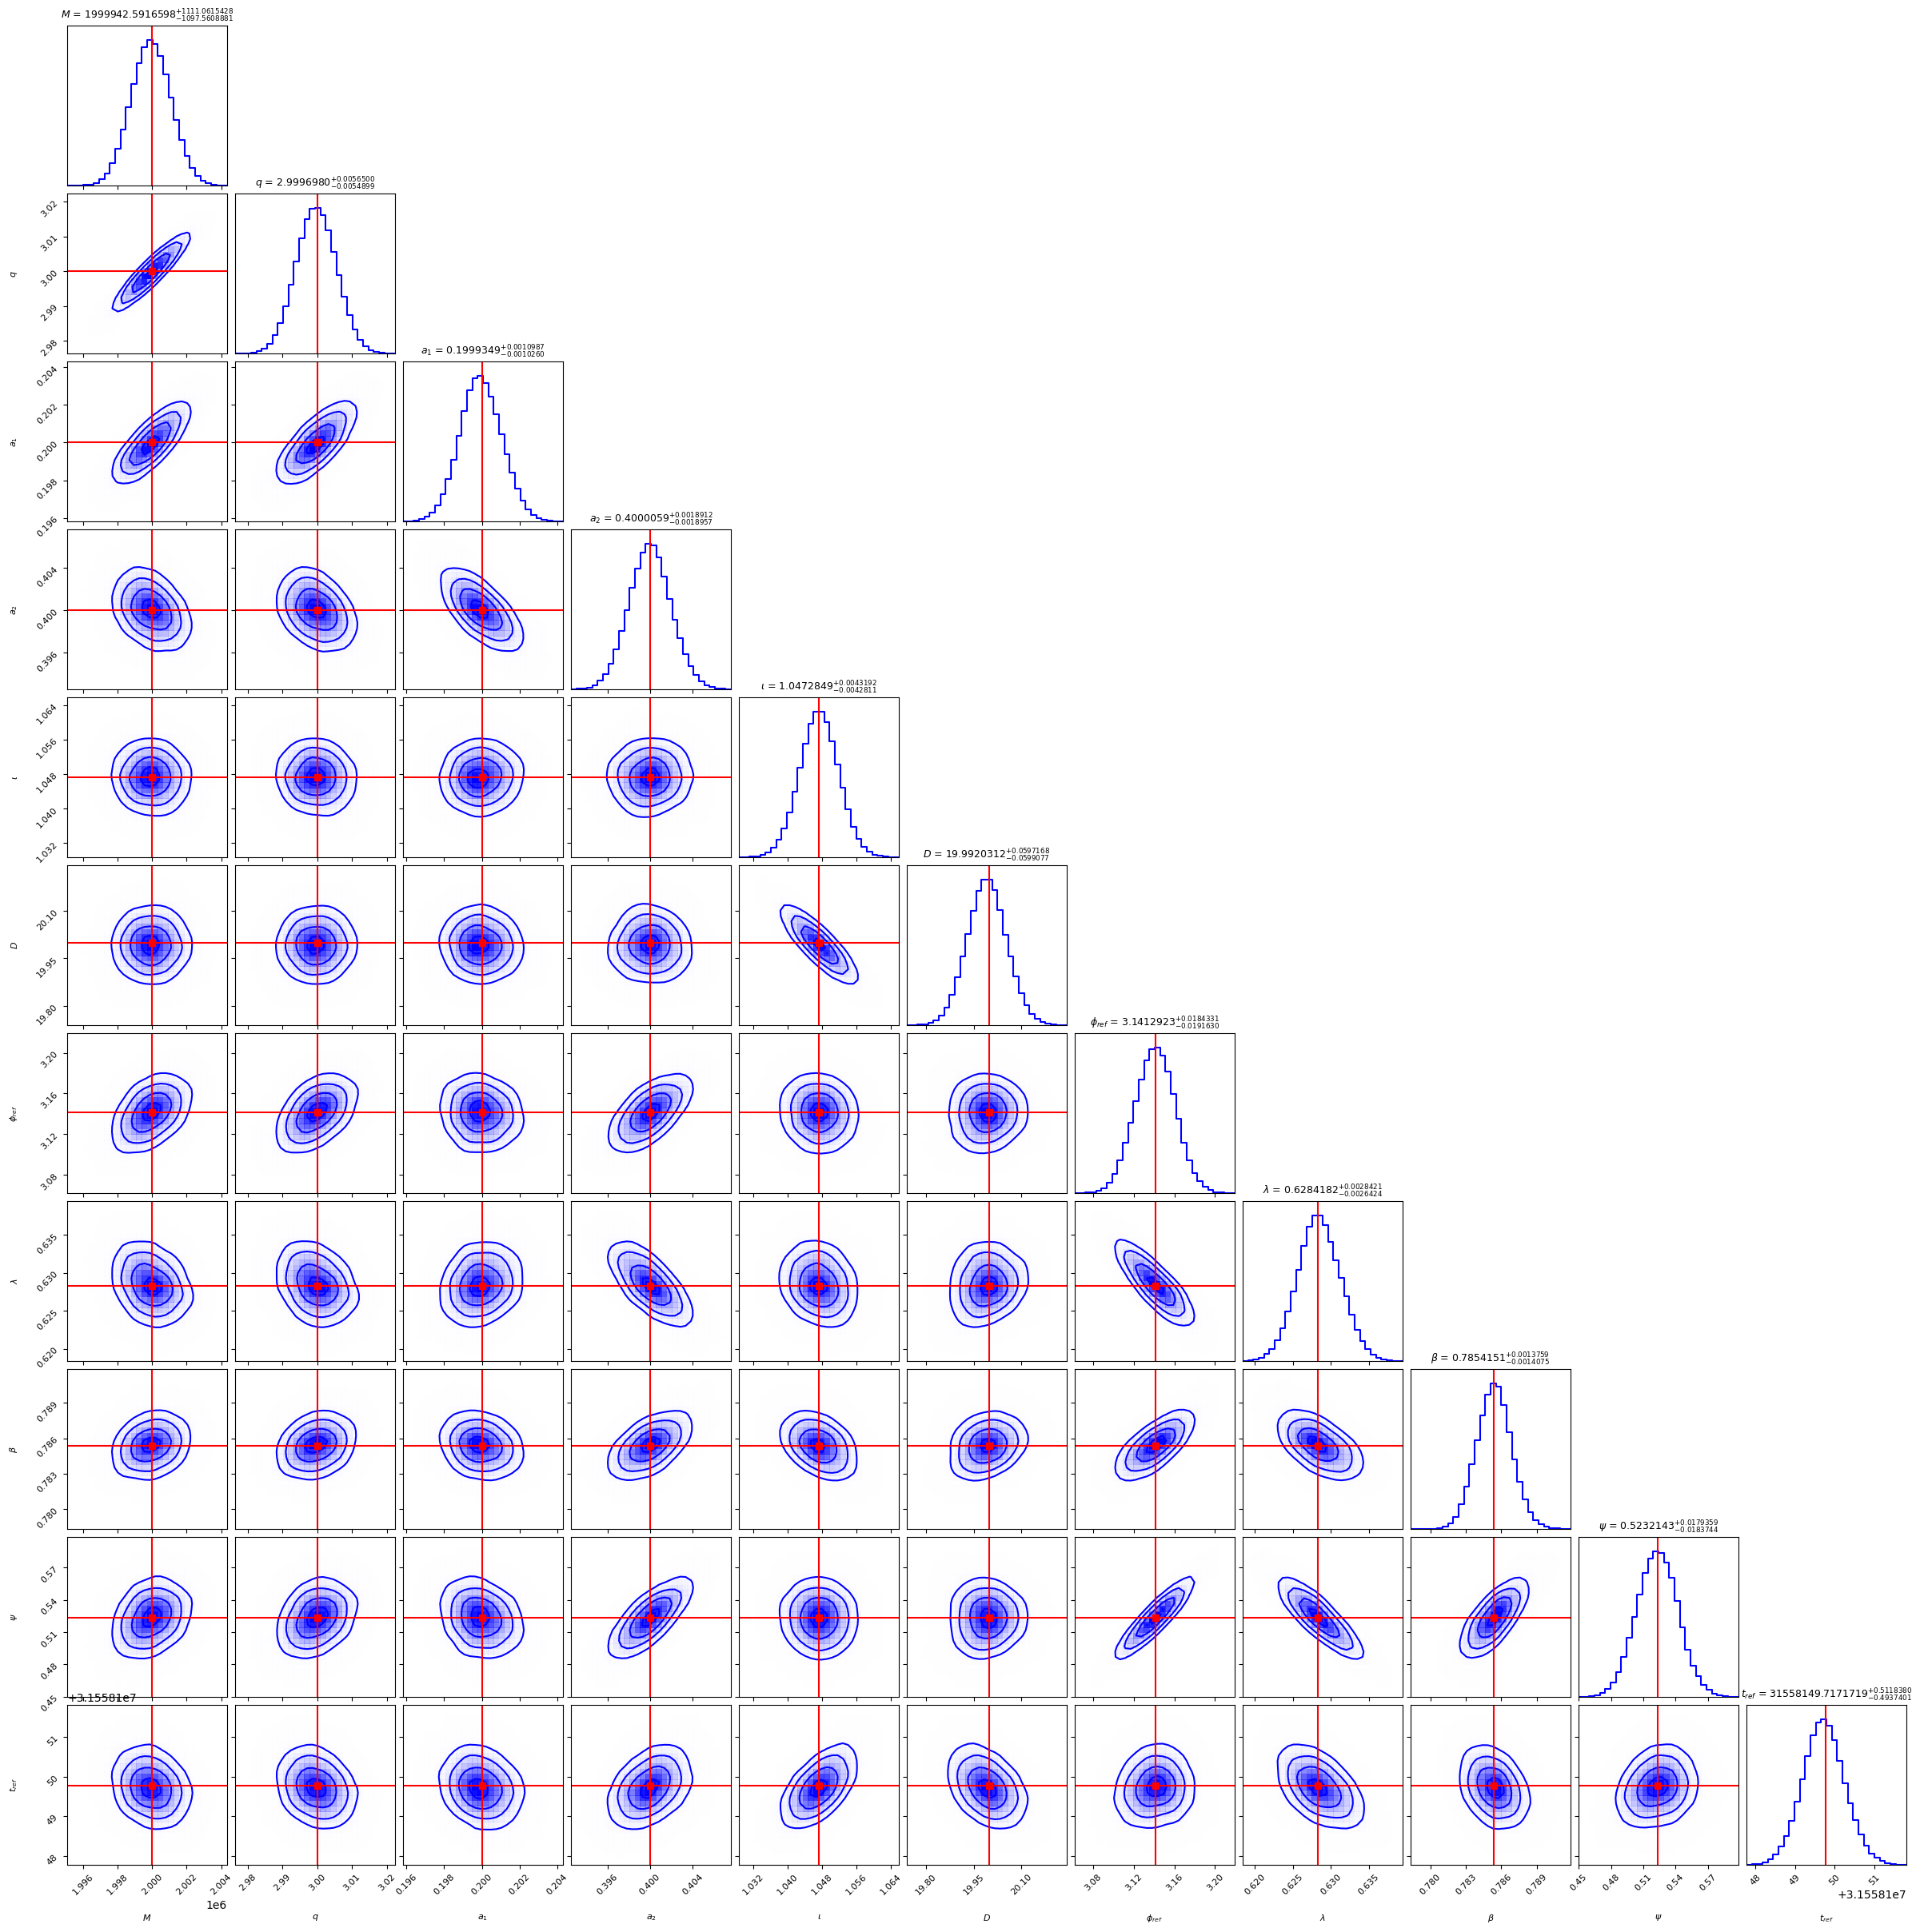

In [18]:
# Corner plot
# os.chdir(plot_directory)
params =[r"$M$", r"$q$", r"$a_{1}$", r"$a_{2}$", r"$\iota$","$D$", r"$\phi_{ref}$", r"$\lambda$",  
       r"$\beta$", r"$\psi$" , r"$t_{ref}$"] 

N_param = len(params)

true_vals = [true_vals_dict[true_vals_label_string[j]] for j in range(0,N_param)]

import corner
samples_MCMC = np.column_stack(collected_samps_MCMC)

figure = corner.corner(samples_MCMC,bins = 30, color = 'blue',plot_datapoints=False,smooth1d=True,
                       labels=params, 
                       label_kwargs = {"fontsize":8},set_xlabel = {'fontsize': 8},
                       show_titles=True, title_fmt='.7f',title_kwargs={"fontsize": 9},smooth = True)
# figure.set_figwidth(10)
# figure.set_figheight(10)
axes = np.array(figure.axes).reshape((N_param, N_param))
for i in range(N_param):
    ax = axes[i, i]
    ax.axvline(true_vals[i], color="r")
    
for yi in range(N_param):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axhline(true_vals[yi], color="r")
        ax.axvline(true_vals[xi],color= "r")
        ax.plot(true_vals[xi], true_vals[yi], "sr")
        
for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=8)
    
# plt.savefig(data_file + ".pdf")

In [19]:
# Fisher matrix time:

os.chdir("../../Fisher_Matrix/FM_results/")

In [20]:
param_cov = np.load("Param_Cov_AE.npy").astype(float)

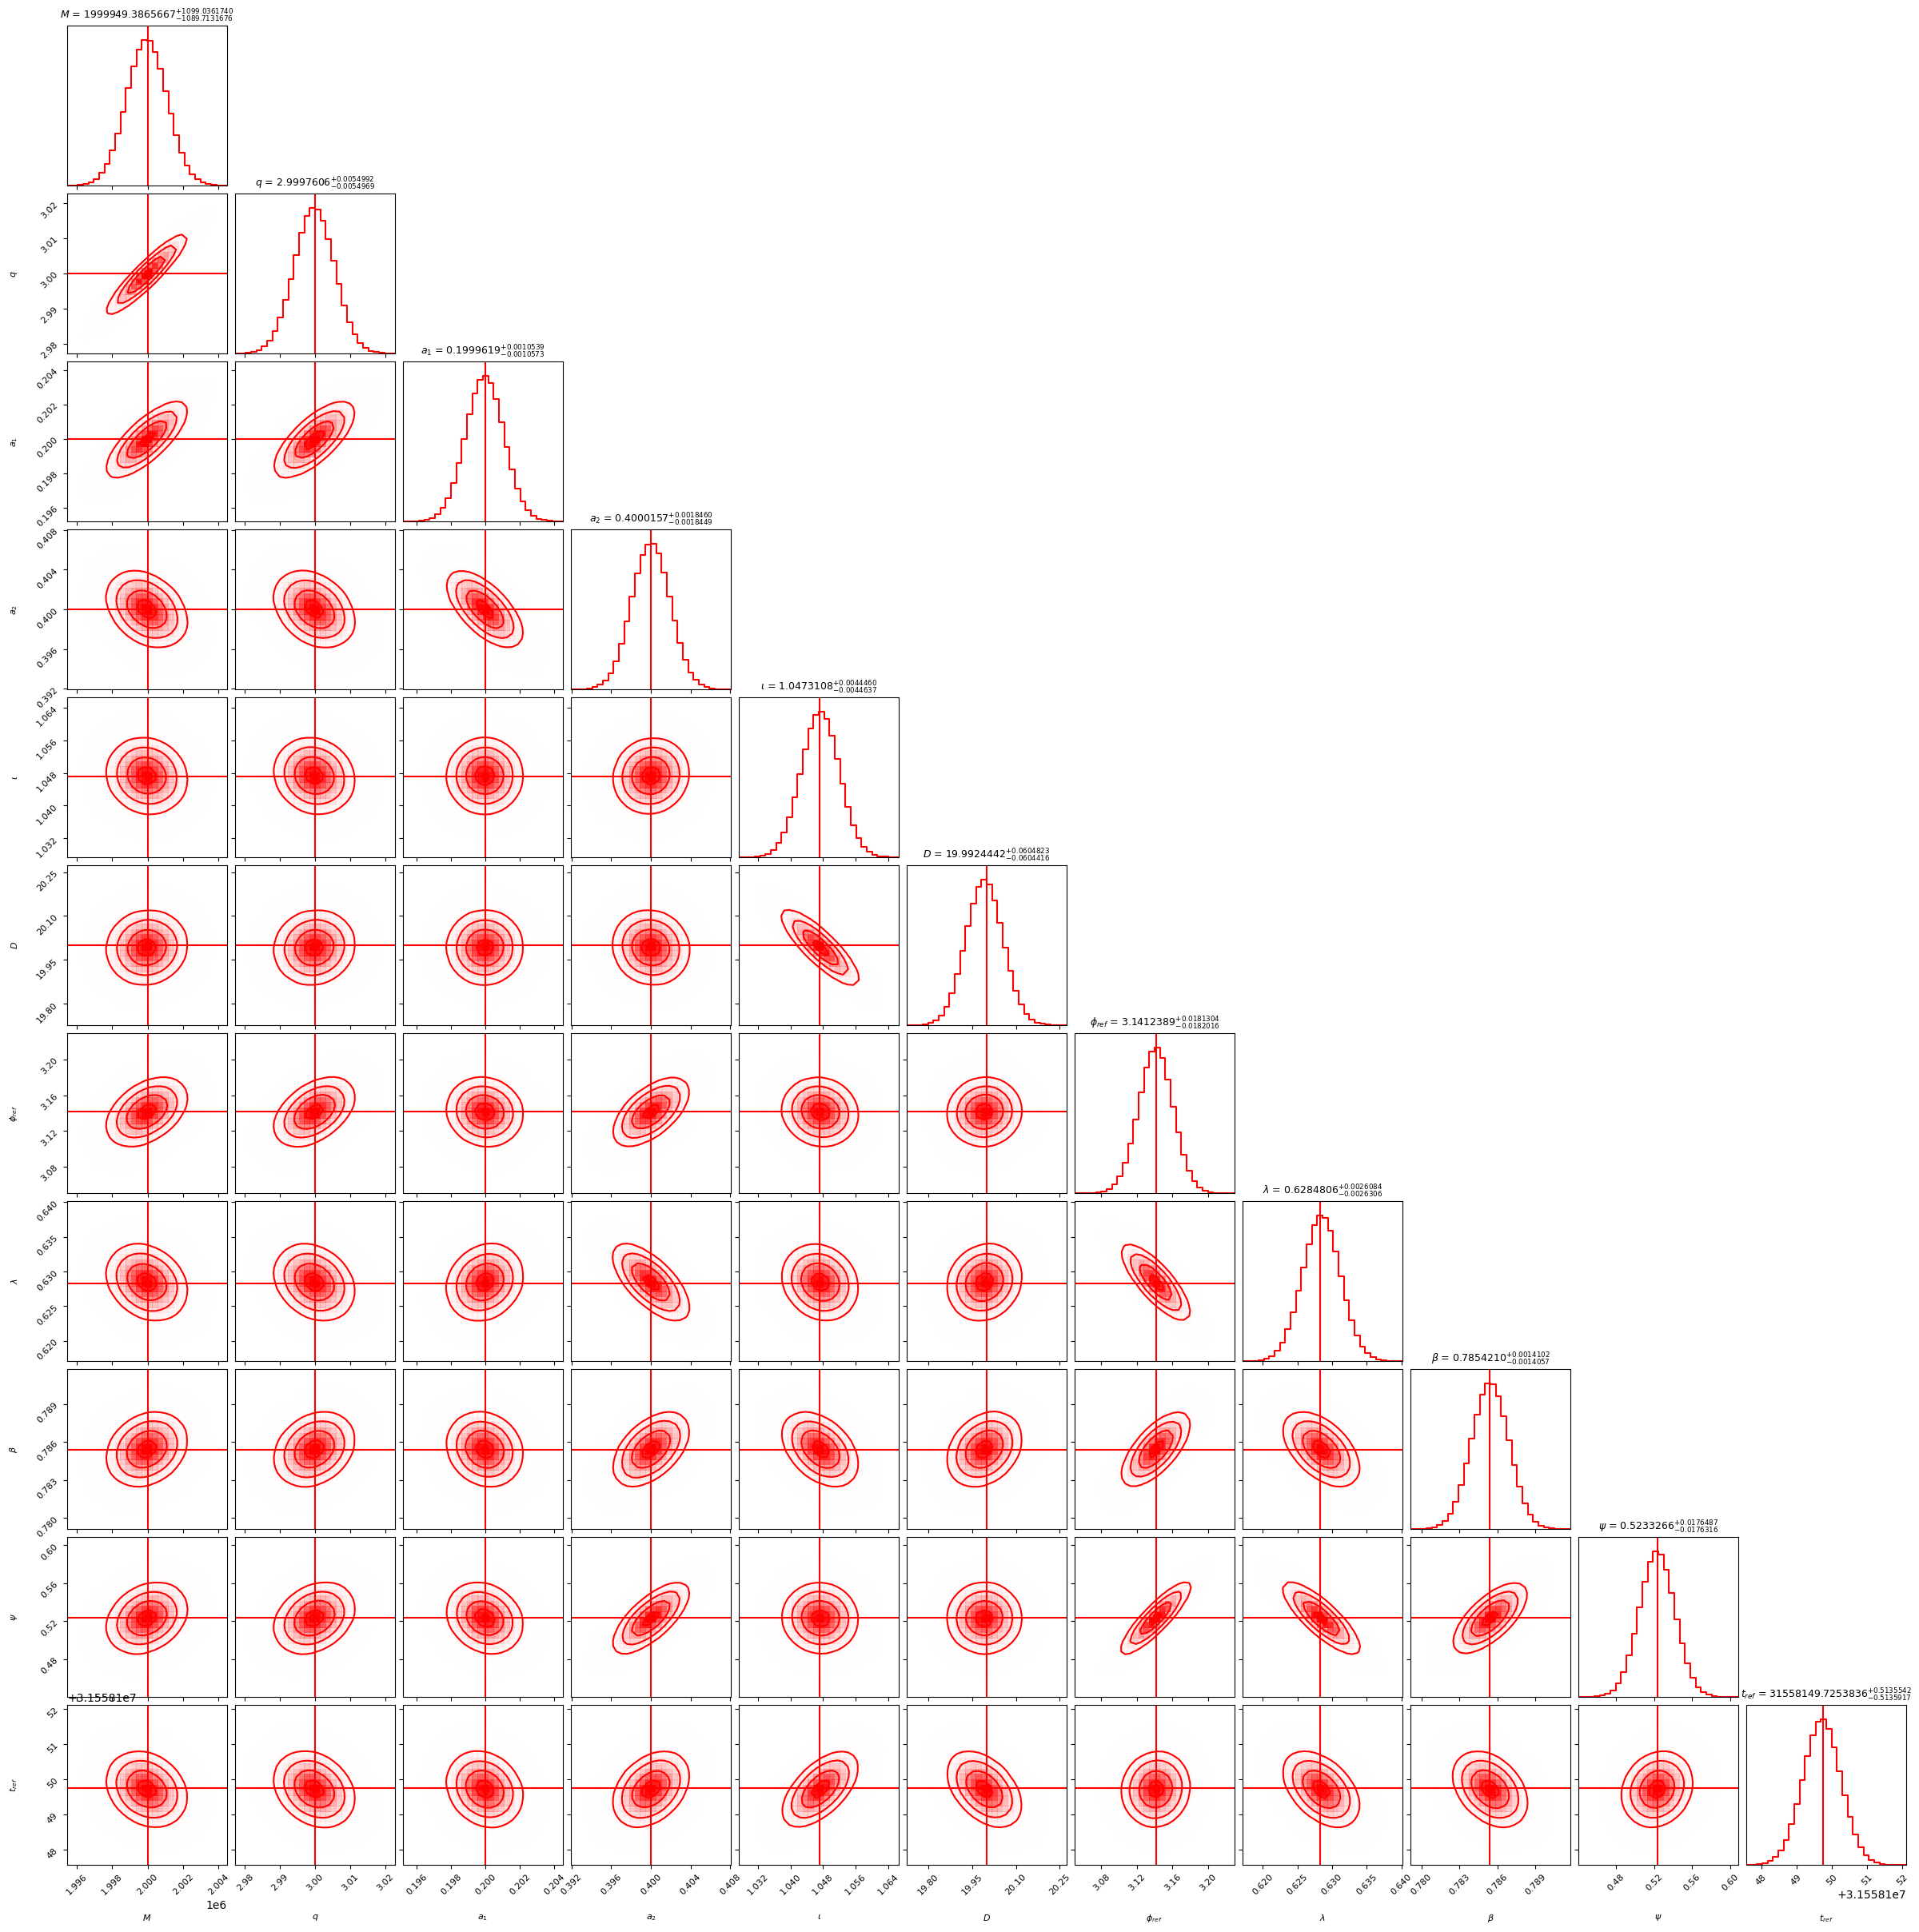

In [22]:
# Read in FM and try reproduce the same plot


mean_vals = np.array([np.mean(collected_samps_MCMC[j]) for j in range(N_param)])

samples_from_FM = np.random.multivariate_normal(mean_vals,param_cov,N_samps+1000)

collected_samps_FM = [samples_from_FM[:,i] for i in range(N_param)]

samples_FM = np.column_stack(collected_samps_FM)

figure = corner.corner(samples_FM,bins = 30, color = 'red',plot_datapoints=False,smooth1d=True,
                       labels=params, 
                       label_kwargs = {"fontsize":8},set_xlabel = {'fontsize': 8},
                       show_titles=True, title_fmt='.7f',title_kwargs={"fontsize": 9},smooth = True)
# figure.set_figwidth(10)
# figure.set_figheight(10)
axes = np.array(figure.axes).reshape((N_param, N_param))
for i in range(N_param):
    ax = axes[i, i]
    ax.axvline(true_vals[i], color="r")
    
for yi in range(N_param):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axhline(true_vals[yi], color="r")
        ax.axvline(true_vals[xi],color= "r")
        ax.plot(true_vals[xi], true_vals[yi], "sr")
        
for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=8)
    

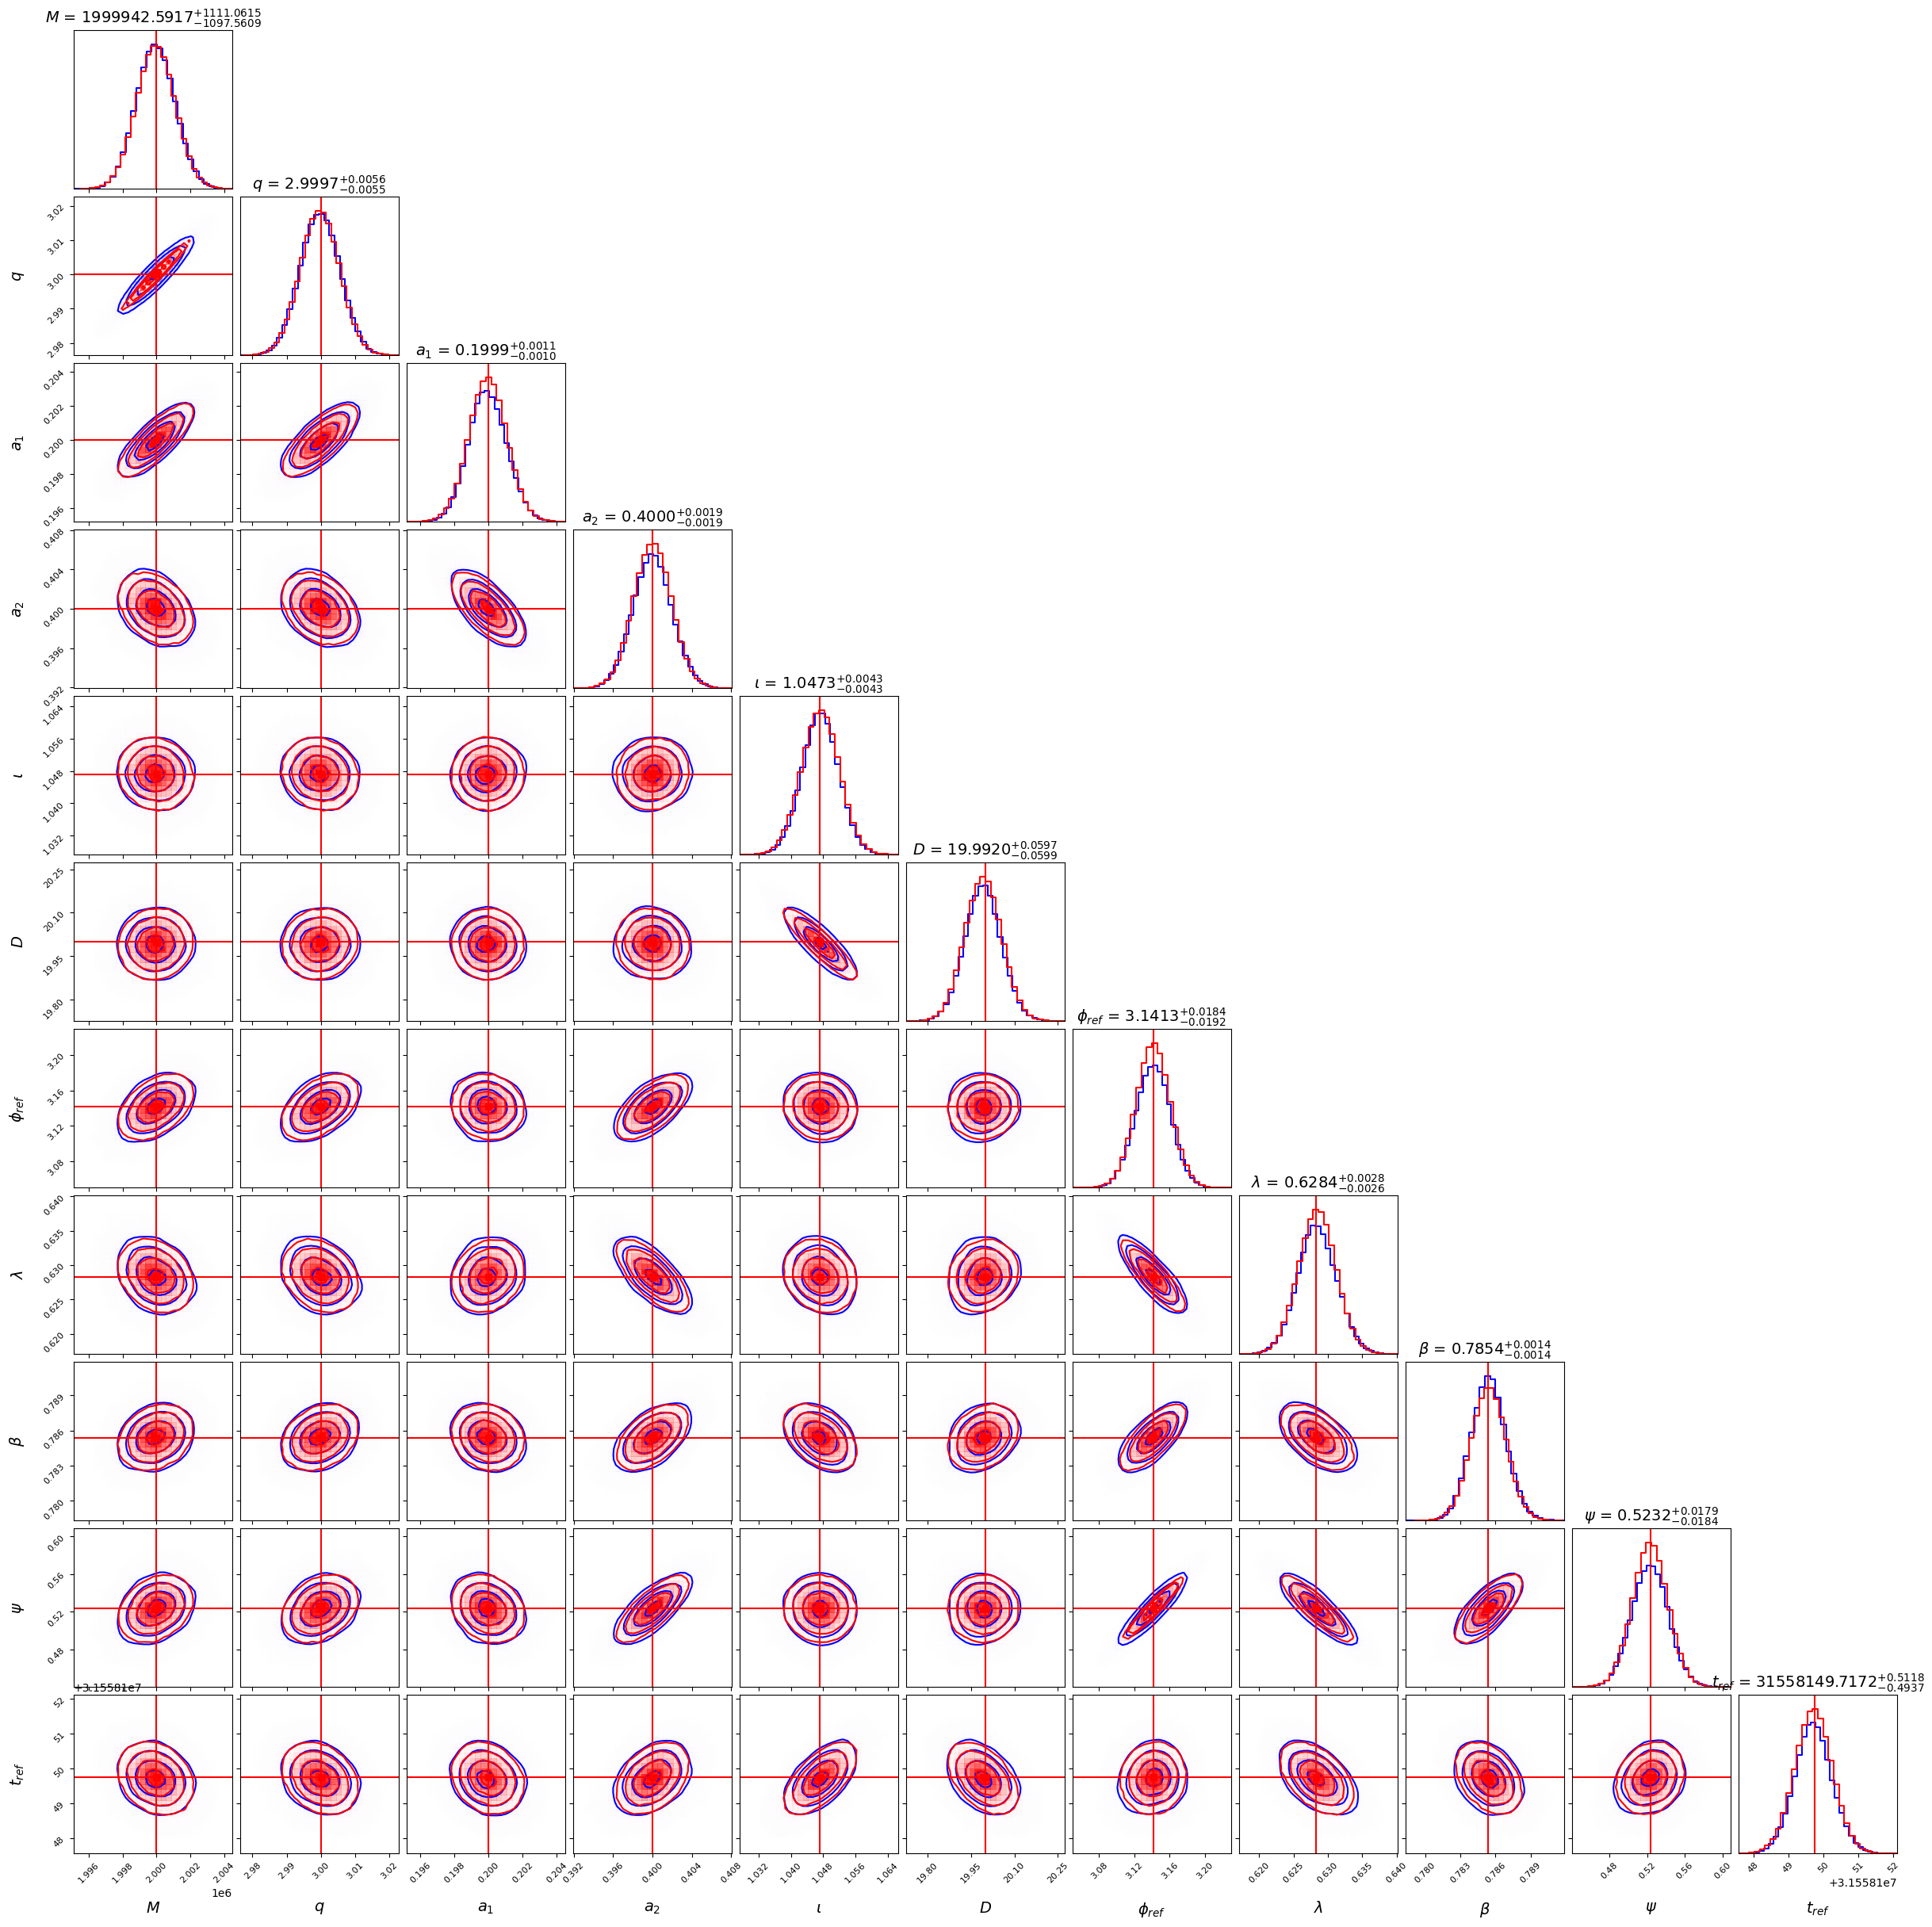

In [23]:
# all together


figure = corner.corner(samples_MCMC,bins = 30, color = 'blue',plot_density = True, plot_datapoints=False,smooth1d=True,
                       labels=params, 
                       label_kwargs = {"fontsize":14},set_xlabel = {'fontsize': 14},
                       show_titles=True, title_fmt='.4f',title_kwargs={"fontsize": 14},smooth = True)

corner.corner(samples_FM,fig = figure,bins = 30, color = 'red',plot_density = True, plot_datapoints=False,smooth1d=True,
                       labels=params)


# figure.set_figwidth(10)
# figure.set_figheight(10)
axes = np.array(figure.axes).reshape((N_param, N_param))
for i in range(N_param):
    ax = axes[i, i]
    ax.axvline(true_vals[i], color="r")
    
for yi in range(N_param):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axhline(true_vals[yi], color="r")
        ax.axvline(true_vals[xi],color= "r")
        ax.plot(true_vals[xi], true_vals[yi], "sr")
        
for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=8)